In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'content/input/chatgpt-reviews-daily-updated/chatgpt_reviews.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,68d64f6f-fb1e-4d3f-85c7-2c9f50c6b299,larry tornetta,great,5,0,1.2024.297,2024-10-30 14:05:50,1.2024.297
1,8e5cf945-d825-497b-b1ca-441d91ea83f8,CAROLINA Bobiles,i love this app very much,5,0,1.2024.268,2024-10-30 14:05:09,1.2024.268
2,0c45a593-582a-4f0e-bc10-8bb74450a6c4,Lokesh Reddy A,it's really wonderful and fantastic app.This a...,5,0,1.2024.268,2024-10-30 14:04:46,1.2024.268
3,014c5f92-8595-4b59-a293-3e7a1f4ec1f8,Muhammed Asmeer,good,5,0,1.2024.297,2024-10-30 14:01:58,1.2024.297
4,afd454e0-7b5d-44a6-9022-4a5d6f57d22e,Diksharth Singh,"i want some extra features,,,like prediction t...",5,0,1.2024.268,2024-10-30 14:00:11,1.2024.268


In [4]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     9
score                       0
thumbsUpCount               0
reviewCreatedVersion    23174
at                          0
appVersion              23174
dtype: int64

In [5]:
df['at'] = pd.to_datetime(df['at'])
df['reviewCreatedVersion'].fillna('Unknown', inplace=True)
df['appVersion'].fillna('Unknown', inplace=True)

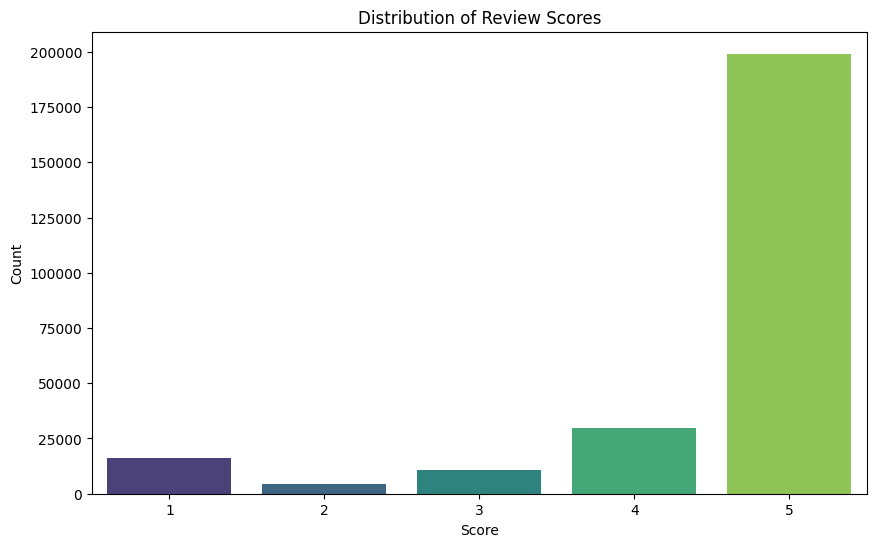

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

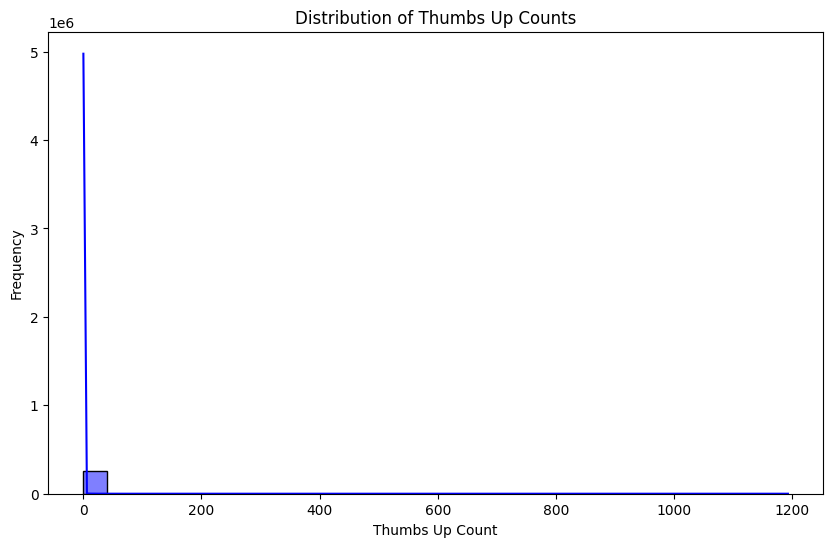

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['thumbsUpCount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Thumbs Up Counts')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()

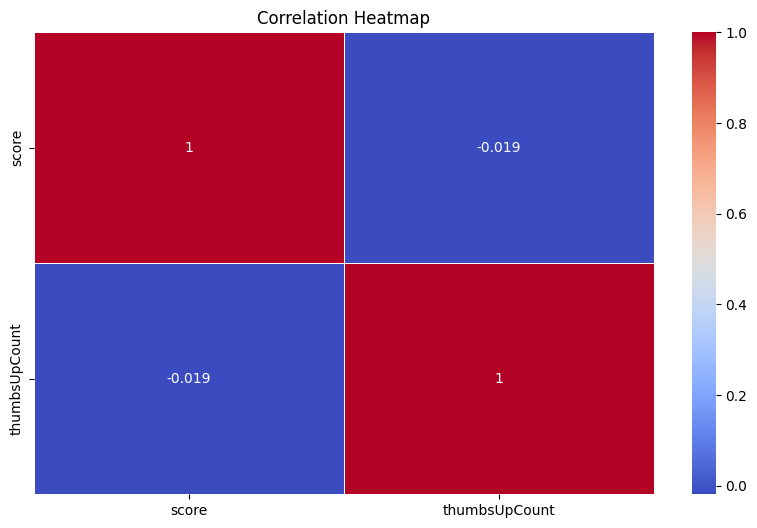

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
X = df[['thumbsUpCount']]
y = df['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7634600957931791

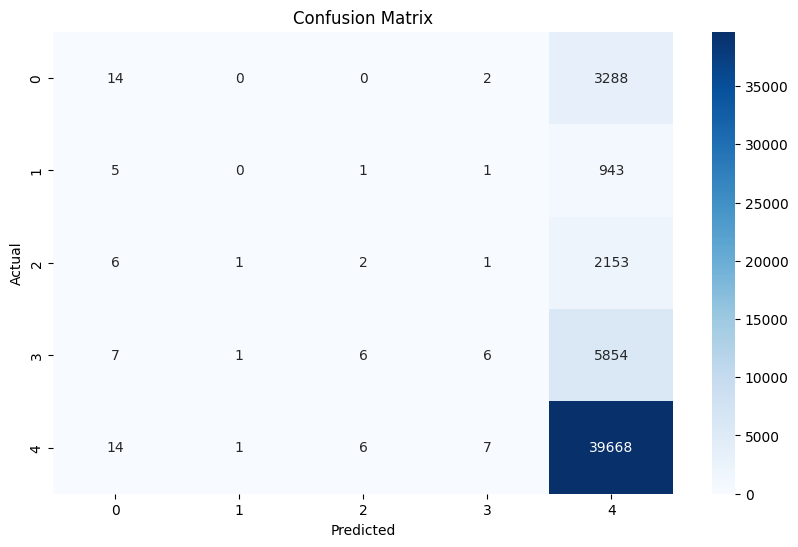

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()